In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [ ]:
# Loading MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Dim x_train:", x_train.shape)
print("Dim y_train:", y_train.shape)
print("Dim x_test:", x_test.shape)
print("Dim y_test:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Dim x_train: (60000, 28, 28)
Dim y_train: (60000,)
Dim x_test: (10000, 28, 28)
Dim y_test: (10000,)


In [ ]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
x_train_n = x_train / 255 # normalization
x_test_n = x_test / 255
x_train_n[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
x_train_r = tf.reshape(x_train_n, (x_train_n.shape[0], -1)) # reshape to 1-D
x_test_r = tf.reshape(x_test_n, (x_test_n.shape[0], -1))

In [ ]:
print(x_train_n.shape)
print(x_train_r.shape)

(60000, 28, 28)
(60000, 784)


## Simple 2 layer AE

In [ ]:
def simple_ae(dim_inputs, encoder_units, decoder_units):
  inputs =  tf.keras.layers.Input(shape=(dim_inputs,))
  encoder = tf.keras.layers.Dense(units=encoder_units, activation='relu', name='enc_0')(inputs)
  decoder = tf.keras.layers.Dense(units=decoder_units, activation='sigmoid', name='dec_0')(encoder)
  model = tf.keras.Model(inputs=inputs, outputs=decoder)
  return model

In [ ]:
# (dim_inputs, 128, dim_inputs)
ae_128 = simple_ae(x_train_r.shape[1], 128, x_train_r.shape[1])
# binary to check the values of each pixel, which are between 0-1 due to normalization, that's why we use sigmoid activation and binary_crossentropy loss (as segmentation networks)
ae_128.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# (dim_inputs, 64, dim_inputs)
ae_64 = simple_ae(x_train_r.shape[1], 64, x_train_r.shape[1])
ae_64.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# (dim_inputs, 16, dim_inputs)
ae_16 = simple_ae(x_train_r.shape[1], 16, x_train_r.shape[1])
ae_16.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

## Train of the models

In [ ]:
ae_128.fit(x_train_r, x_train_r, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0660 - accuracy: 0.0145
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0660 - accuracy: 0.0147
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0659 - accuracy: 0.0144
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0659 - accuracy: 0.0148
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0659 - accuracy: 0.0151
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0658 - accuracy: 0.0146
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0658 - accuracy: 0.0150
Epoch 8/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.0150
Epoch 9/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.0151
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0658 - accuracy: 0.0149

In [ ]:
ae_64.fit(x_train_r, x_train_r, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.0138
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.0138
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.0136
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.0139
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.0134
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.0138
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0729 - accuracy: 0.0134
Epoch 8/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0729 - accuracy: 0.0135
Epoch 9/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0729 - accuracy: 0.0132
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0729 - accuracy: 0.0135

In [ ]:
ae_16.fit(x_train_r, x_train_r, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.3078 - accuracy: 0.0107
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1980 - accuracy: 0.0122
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1716 - accuracy: 0.0117
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1573 - accuracy: 0.0100
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1486 - accuracy: 0.0095
Epoch 6/30
235/235 [==============================] - 1s 6ms/step - loss: 0.1441 - accuracy: 0.0101
Epoch 7/30
235/235 [==============================] - 1s 6ms/step - loss: 0.1414 - accuracy: 0.0103
Epoch 8/30
235/235 [==============================] - 1s 6ms/step - loss: 0.1394 - accuracy: 0.0108
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1376 - accuracy: 0.0108
Epoch 10/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1361 - accuracy: 0.0110

In [ ]:
ae_128.save('ae_128.h5')
ae_64.save('ae_64.h5')
ae_16.save('ae_16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Models test

In [ ]:
m_128 = tf.keras.models.load_model('ae_128.h5')
m_64 = tf.keras.models.load_model('ae_64.h5')
m_16 = tf.keras.models.load_model('ae_16.h5')

In [ ]:
sample_index = np.array([8730, 3281, 2994, 1599, 5450])
sample_index

array([8730, 3281, 2994, 1599, 5450])

In [ ]:
def inference(model, sample_index, x_set):

  fig, axs = plt.subplots(2, len(sample_index), figsize=(12,6))

  for i,index in enumerate(sample_index):
    pred = model.predict(tf.expand_dims(x_set[index],axis=0), verbose=0)
    pred = tf.reshape(pred, (28,28))
    axs[0,i].imshow(tf.reshape(x_set[index], (28,28)),cmap='gray')
    axs[0,i].axis('off')
    axs[1,i].imshow(pred, cmap='gray')
    axs[1,i].axis('off')

  ax_top = fig.add_subplot(2, 1, 1)
  ax_top.axis('off')
  ax_top.set_title("Original images")

  ax_top = fig.add_subplot(2, 1, 2)
  ax_top.axis('off')
  ax_top.set_title("Predictions")


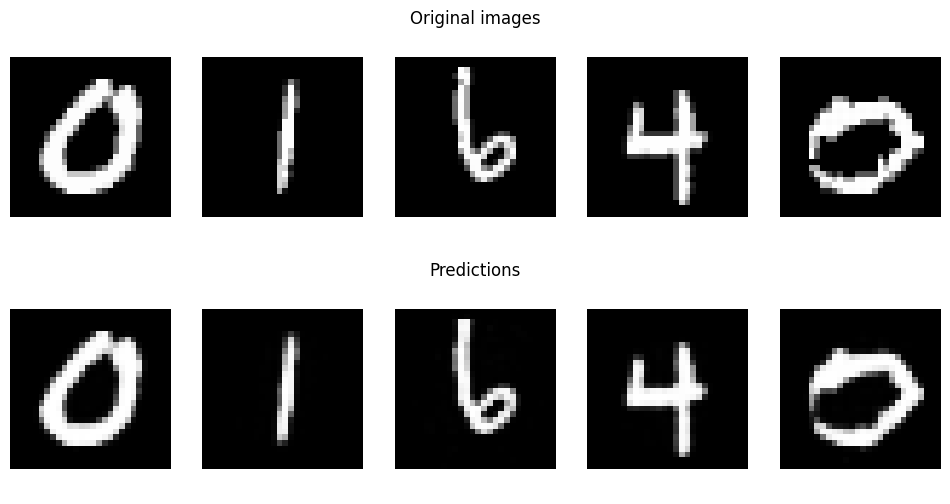

In [ ]:
inference(ae_128, sample_index, x_test_r)

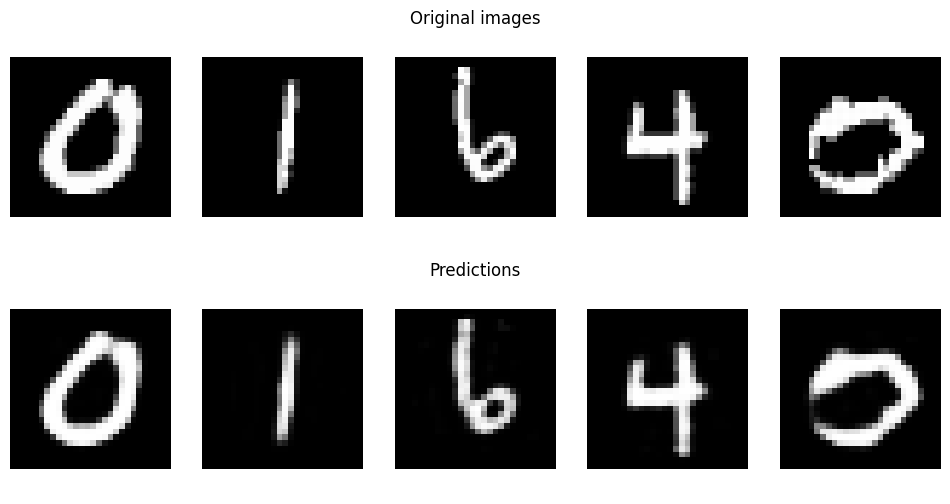

In [ ]:
inference(ae_64, sample_index, x_test_r)

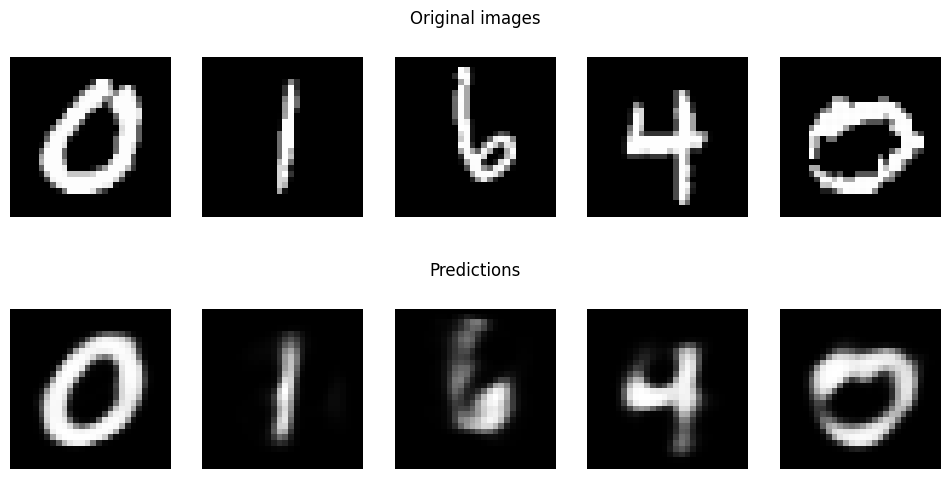

In [ ]:
inference(ae_16, sample_index, x_test_r)

## Latent spaces

In [ ]:
ae_16.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 enc_0 (Dense)               (None, 16)                12560     
                                                                 
 dec_0 (Dense)               (None, 784)               13328     
                                                                 
Total params: 25888 (101.12 KB)
Trainable params: 25888 (101.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
latent_space = ae_16.get_layer('enc_0')

latent_model = tf.keras.models.Model(inputs=ae_16.input, outputs=latent_space.output)

lat = latent_model.predict(tf.expand_dims(x_test_r[2994],axis=0), verbose=0)

lat.shape

(1, 16)

(-0.5, 3.5, 3.5, -0.5)

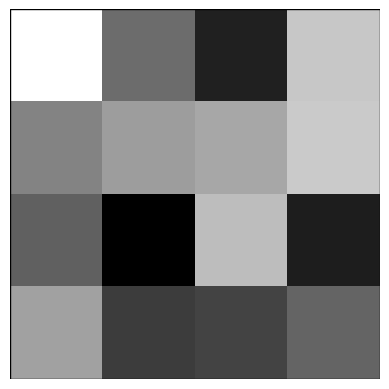

In [ ]:
image = lat.reshape((4,4))

plt.imshow(image, cmap = 'gray')
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), 4, 4, edgecolor='black', linewidth=1, fill=False))
plt.axis('off')